**#0 Importy i wczytanie bazy**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


**#1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?**

In [6]:
df['ManagerName'].unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater', nan],
      dtype=object)

In [7]:
df['ManagerID'].unique()

array([ 1., 17., 21., 13.,  5.,  2.,  4.,  6.,  7.,  9., 11., 12., 14.,
       16., 18., 19., 20., 22., 39., nan, 30., 15., 10.,  3.])

In [8]:
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement', nan],
      dtype=object)

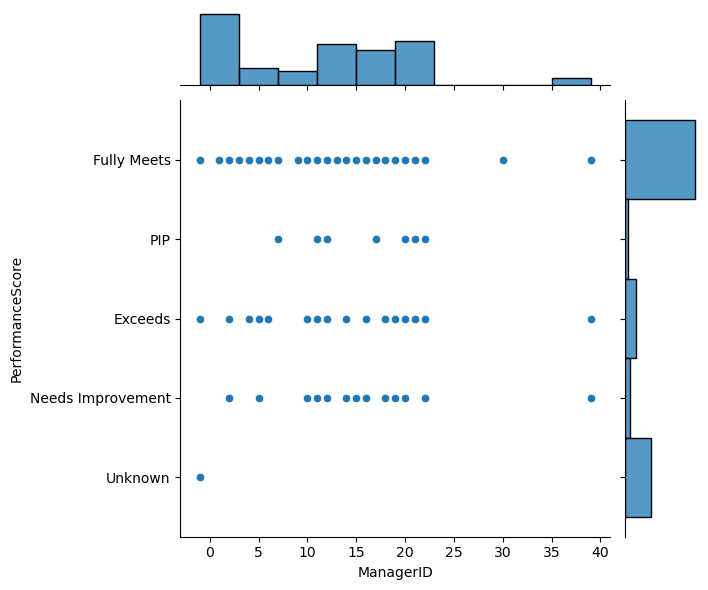

In [21]:
sns.jointplot(x = 'ManagerID', y = 'PerformanceScore', data = df)

**Na podstawie wykresu sądzę, że istnieje zależność między przełożonym a wydajnością pracy pracownika. Ponieważ MenagerName jest ściśle powiązany z MenagerID uważam, że menadżerowie o numerze ID pomiędzy 0 a 20 wpływają na lepszą wydajność pracy pracownika**

**#2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?**

In [36]:
import datetime as dt

def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = pd.Timestamp('2019-09-27')
    else:
        end_date = pd.Timestamp(row['DateofTermination'])
    # Obliczanie liczby dni między datami i przeliczanie na lata
    return (end_date - pd.Timestamp(row['DateofHire'])).days / 365.25

In [37]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority','RecruitmentSource']].head()

,DateofHire,DateofTermination,Seniority,RecruitmentSource
0,2008-10-27,NaN,10.915811,Diversity Job Fair
1,2014-01-06,NaN,5.722108,Website Banner Ads
2,2014-09-29,NaN,4.993840,Internet Search
3,2015-02-16,04/15/15,0.158795,Pay Per Click - Google
4,2015-05-01,NaN,4.407940,Website Banner Ads


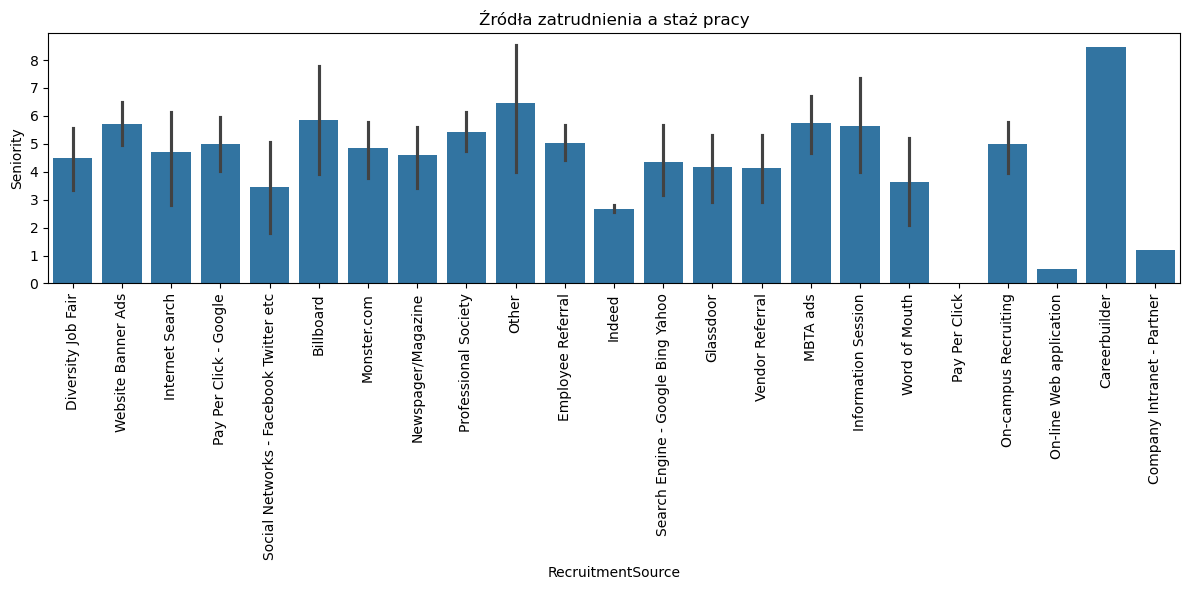

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='RecruitmentSource', y='Seniority')
plt.xticks(rotation=90)
plt.title('Źródła zatrudnienia a staż pracy')
plt.xlabel('RecruitmentSource')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()

**Na podstawie wykresu słupkowego stwierdzam, że najlepsze źródła zatrudnienia mające wpływ na staż pracy pracownika to 'Careerbuilder', 'Other' oraz 'Billboard'**

**#3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?**

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\520549550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction', palette='bright')


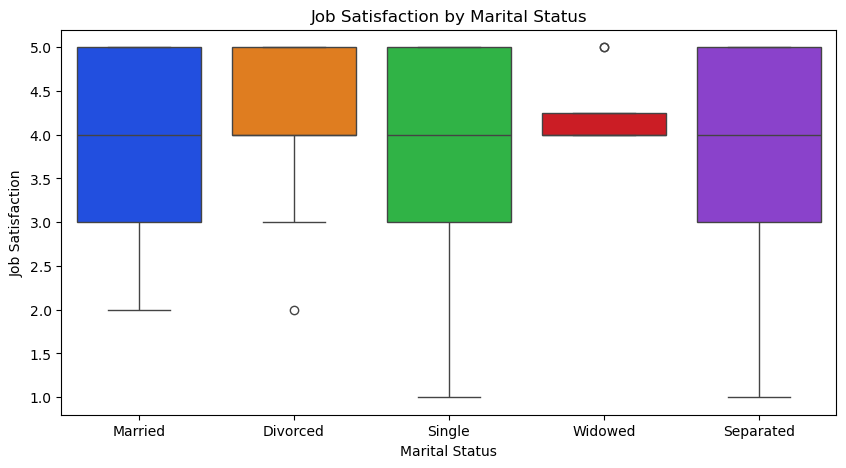

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction', palette='bright')
plt.title('Job Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Job Satisfaction')
plt.show()

**Na podstawie wizualizacji nie wydaje się, aby istniał silny związek między stanem cywilnym a zadowoleniem z pracy, ponieważ większość grup ma podobne mediany i zakresy**

**#4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?**

In [94]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

In [95]:
def calculate_age(row):
    current_date = pd.Timestamp('2019-09-27')
    if pd.isnull(row['DOB']) or row['DOB'] > current_date:
        return None  
    age = (current_date - row['DOB']).days / 365.25
    return max(age, 0)

In [98]:
df['Age'] = df.apply(calculate_age, axis=1)

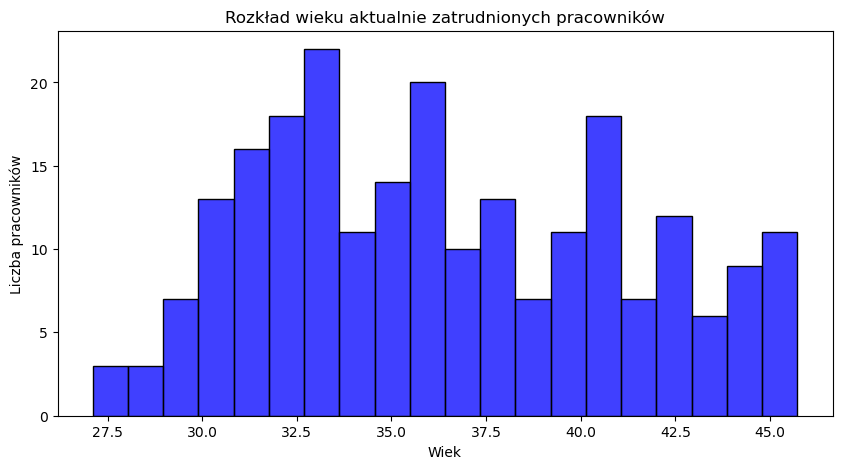

In [99]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, color='blue')
plt.title('Rozkład wieku aktualnie zatrudnionych pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()


**Struktura wieku pracowników przedstawiona jest na histogramie powyżej**

**#5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?**

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\1006691749.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('AgeGroup')['SpecialProjectsCount'].mean().reset_index()
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\1006691749.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=age_group_avg, palette='viridis')


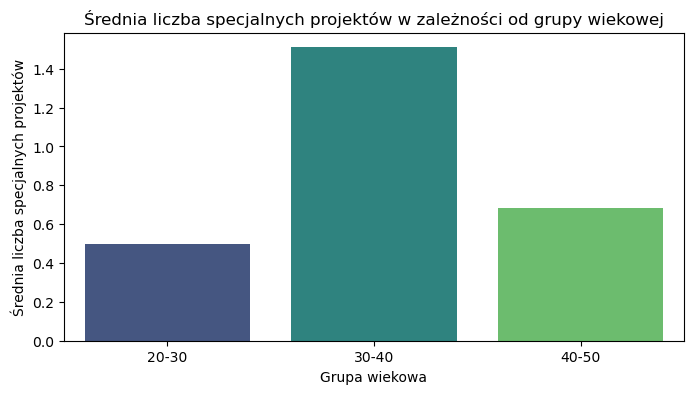

In [116]:
bins = [20, 30, 40, 50] 
labels = ['20-30', '30-40', '40-50'] 

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_avg = df.groupby('AgeGroup')['SpecialProjectsCount'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=age_group_avg, palette='viridis')
plt.title('Średnia liczba specjalnych projektów w zależności od grupy wiekowej')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Średnia liczba specjalnych projektów')
plt.show()

**Na podstawie powyższego wykresu nie można stwierdzić, że starsi pracownicy pracują nad większą liczbą specjalnych projektów**